m = 9449.962321455143, b =25792.20019866825


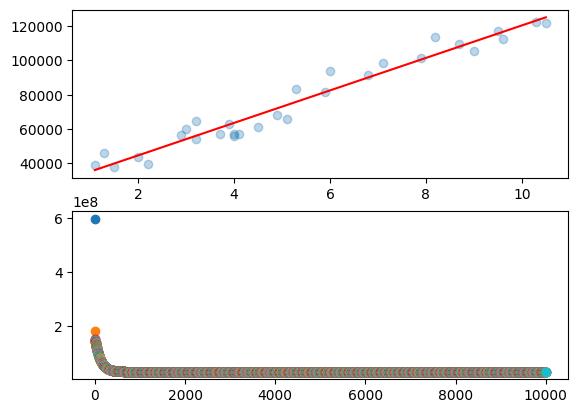

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Cargar tu archivo CSV con pandas
data = pd.read_csv('/content/regresion lineal simple - Salary_Data.csv - regresion lineal simple - Salary_Data.csv.csv')

# Procesar los datos para obtener las características X y los objetivos Y
X = data['YearsExperience'].values
Y = data['Salary'].values

# en "theta" se guarda [m, b]
# los inicio con valores cualquiera

theta = np.array([0,0])
lr = 0.01
grad = np.zeros(2)

tamano = len(X)

def coste(m, b):
    error = 0
    for i in range(tamano):
        hipotesis = m*X[i]+b
        error += (hipotesis - Y[i])**2
    return error/tamano

def gradiente(m, b):
    m_sum = 0
    b_sum = 0
    for i in range(tamano):
        hipotesis = m*X[i] + b
        m_sum += (hipotesis - Y[i]) * X[i]
        b_sum += (hipotesis - Y[i])
    grad[0] = 2*m_sum/tamano
    grad[1] = 2*b_sum/tamano

    return grad

fig, axs = plt.subplots(2,1)
axs[0].scatter(X,Y, alpha=0.3)

for i in range(10000):
    theta = theta - lr * gradiente(theta[0], theta[1])
    error = coste(theta[0], theta[1])
    axs[1].plot(i, error, "o")

y_pred = theta[0]*X + theta[1]
axs[0].plot(X, y_pred, c="red")

print("m = {}, b ={}".format(theta[0], theta[1]))